In [1]:
from data_cleaning import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=cleaning()
df.head()

,adm0,adm1,adm2,cadm0,cadm1,cadm2,costkgfert,distpmktkm,distsmktkm,farmbuyv,farmsalev,farmtype,fplots,hhelectric,primary_occu,sec_occu,hhrelig,hhsize,hhtribe,incfarm,...,season1_mean_seed_used,season1_mean_seed_value,season2_mean_seed_value,no_of_crop_types,avg_yield_per_crop_type,water_supply,season2_water_supply,season1_avg_fertilizer,season2_avg_fertilizer,season1_avg_pesticide,avg_price_equip,avg_lifespan_equip,avg_no_equipment,total_tax_paid,number_of_laborers,days_spent_by_laborers,livestock_number_of_laborers,days_spent_by_livestock_laborers,labor_wage_payment,kind_payment
0,burkinafaso,Bam,Tikare,1,1,6.0,250.0,2.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,3,22.0,Mossi,610.699454,...,1.707143e+01,225.0,NaN,5.0,924.800000,4.0,NaN,150.000000,NaN,NaN,144232.184227,4.778991,15.407563,3000.000000,28.0,16.919925,0.0,0.0,0.000000,5029.505259
1,burkinafaso,Bam,Tikare,1,1,6.0,250.0,2.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,3,20.0,Mossi,44945.690127,...,2.436626e+07,585.0,NaN,5.0,546.000000,4.0,NaN,50.000000,NaN,NaN,21037.500000,4.778991,15.407563,3000.000000,21.0,20.000000,0.0,0.0,0.000000,0.000000
2,burkinafaso,Bam,Tikare,1,1,6.0,NaN,2.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,3,12.0,Mossi,1221.398909,...,2.436626e+07,162.5,NaN,5.0,2390.250568,4.0,NaN,NaN,NaN,NaN,17466.666667,4.500000,2.076923,1000.000000,29.0,6.000000,0.0,0.0,1000.000000,0.000000
3,burkinafaso,Bam,Tikare,1,1,6.0,250.0,1.0,1.0,1000000.0,1.000000e+06,1.0,1.0,2.0,1.0,NaN,2,11.0,Mossi,204.380751,...,1.650000e+01,125.0,NaN,5.0,578.000000,4.0,NaN,87.500000,NaN,0.0,23138.888889,4.778991,2.352941,42645.643343,40.0,5.000000,0.0,0.0,583.333333,5029.505259
4,burkinafaso,Bam,Tikare,1,1,6.0,250.0,1.0,1.0,100000.0,2.187439e+07,2.0,1.0,2.0,1.0,12.0,3,24.0,Mossi,44945.690127,...,2.436626e+07,132.5,NaN,5.0,583.200000,4.0,1.0,1972.968099,815.759607,NaN,17097.222222,4.778991,15.407563,1000.000000,21.0,10.000000,0.0,0.0,433.333333,5029.505259


In [3]:
df.shape

(9591, 110)

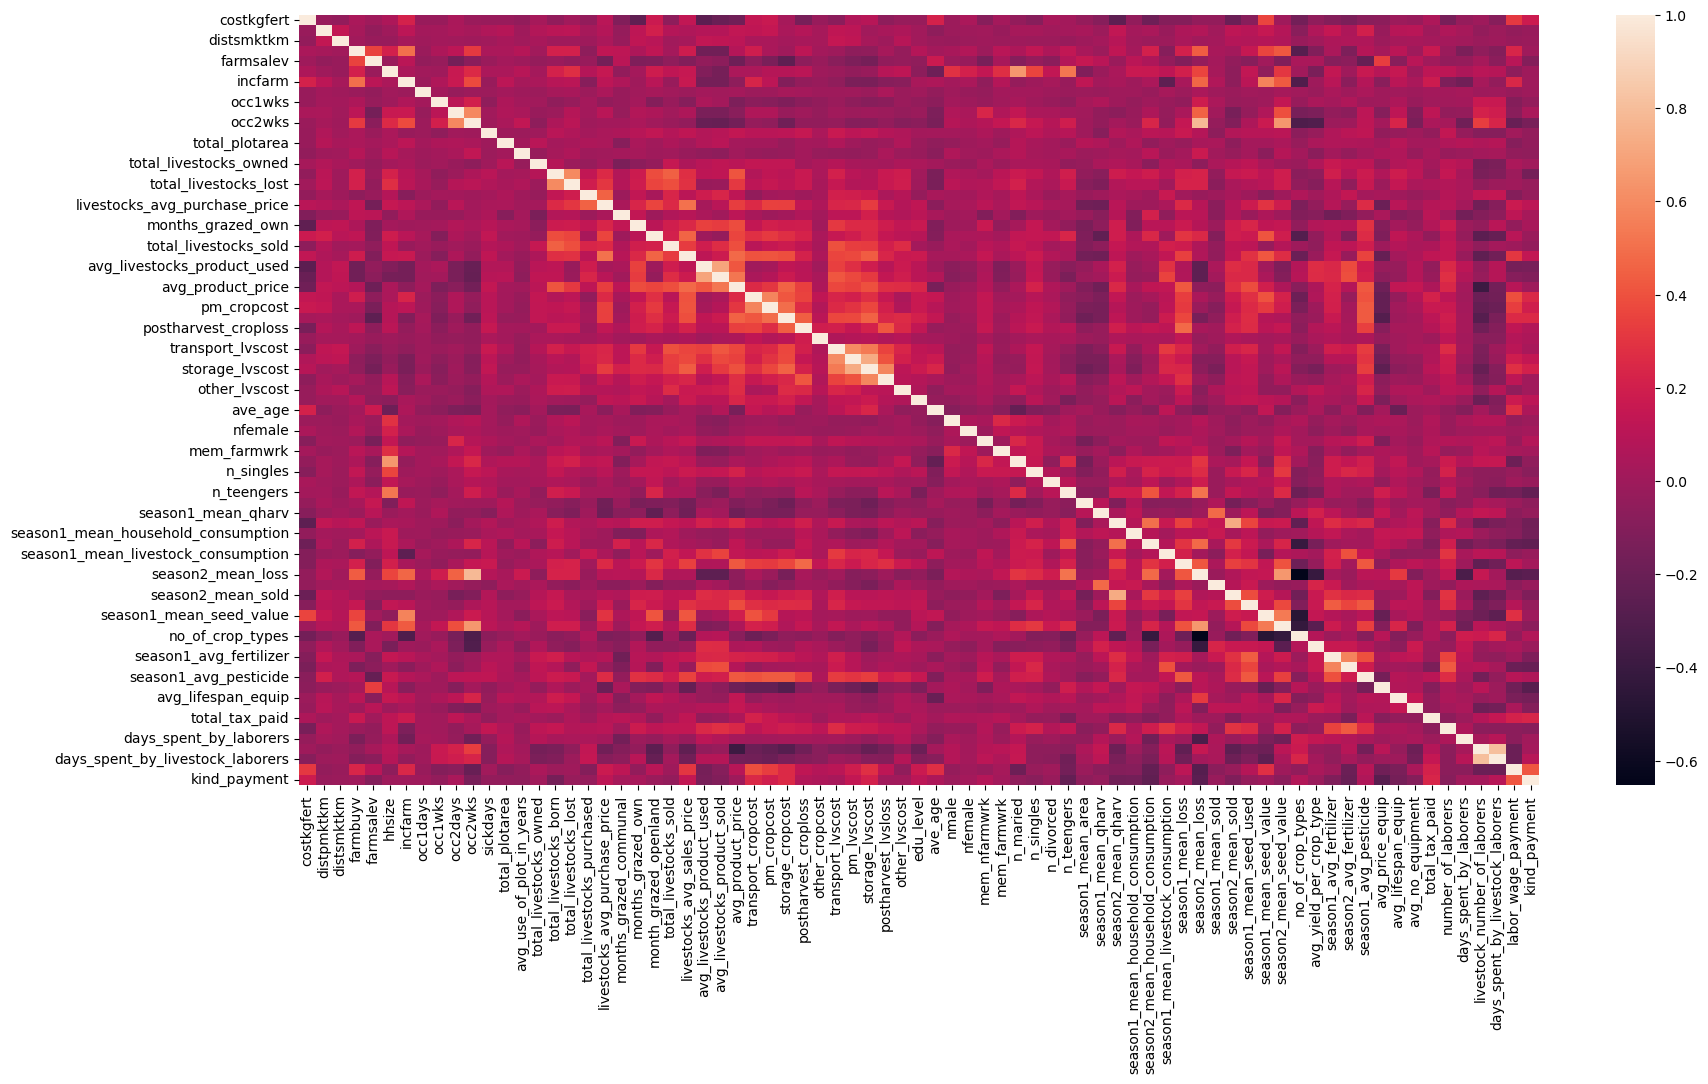

In [7]:
import seaborn as sns
#drop highly correlated features
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr())
plt.show()

from this plot, we can observe that most of the features are lowly correlated

In [8]:
#obtain the object columns, drop the columns that have multiple categories or too few categories
object_col=df.select_dtypes('object').columns

In [9]:
for column in object_col:
    unique_categories = df[column].nunique()
    print(f"Number of unique categories in '{column}': {unique_categories}")

Number of unique categories in 'adm0': 11
Number of unique categories in 'adm1': 120
Number of unique categories in 'adm2': 405
Number of unique categories in 'cadm0': 11
Number of unique categories in 'cadm1': 30
Number of unique categories in 'cadm2': 25
Number of unique categories in 'farmtype': 3
Number of unique categories in 'fplots': 11
Number of unique categories in 'hhelectric': 4
Number of unique categories in 'primary_occu': 13
Number of unique categories in 'sec_occu': 16
Number of unique categories in 'hhrelig': 15
Number of unique categories in 'hhtribe': 1040
Number of unique categories in 'lvsown': 3
Number of unique categories in 'plotunits': 1
Number of unique categories in 'relhead': 10
Number of unique categories in 'seas1nam': 25
Number of unique categories in 'seas2nam': 28
Number of unique categories in 'season1e': 12
Number of unique categories in 'season1s': 12
Number of unique categories in 'season2e': 12
Number of unique categories in 'season2s': 12
Number of

In [10]:
cols_to_keep=['adm0','farmtype','fplots','hhelectric','primary_occu','sec_occu',
              'lvsown','most_common_farmsystem','most_common_tenuresystem',
             'water_supply','season2_water_supply']

#save the object column to a dataframe
df_object=df[cols_to_keep]

In [11]:
#map the countries to numbers
conversion_factors = {
        'niger': 1,
        'ethiopia': 2,
        'zambia': 3,
        'senegal': 4,
        'burkinafaso': 5,
        'egypt': 6,
        'cameroon': 7,
        'ghana': 8,
        'kenya': 9,
        'zimbabwe': 10,
        'south africa': 11
    }
#map countries to numbers

df_object['adm0']=df_object['adm0'].replace(conversion_factors)

In [12]:
#obtain the numeric columns
df_numeric=df.select_dtypes('number')

In [13]:
#concat the two (df_object and df_numberic) into one dataframe

master_df=pd.concat([df_numeric,df_object],axis=1)

In [14]:
master_df.shape

(9591, 86)

In [15]:
#replace nan values with a ffill method
master_df=master_df.fillna(method='ffill')

#drop rows that were not filled
master_df.replace('.',np.nan,inplace=True)
master_df=master_df.dropna()

In [16]:
master_df.shape

(8506, 86)

In [17]:
#convert all datatypes to float for machine learning
master_df=master_df.astype('float')

In [33]:
#import the needed libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [19]:
X=master_df.drop(columns='incfarm')
y=master_df['incfarm']

In [20]:
#split training and testing dataset using a 80-20
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [21]:
#scale the dataset using MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
#train the model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [24]:
#obtain the accuracy on the training and test dataset

print(f'Model accuracy on training data: {round(lr_model.score(X_train,y_train),3)}')
print(f'Model accuracy on test data: {round(lr_model.score(X_test,y_test),3)}')

Model accuracy on training data: 0.63
Model accuracy on test data: 0.631


In [49]:
#calculate the root_mean_squared_error for training and test dataset

# Predict the target variable for the test set
y_pred = lr_model.predict(X_test)

# Calculate the residuals
lr_residuals = y_test - y_pred

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", round(rmse,3))

Root Mean Squared Error: 13511.177


In [30]:
# Train an Xgb model to test the accuracy 
#these parameters were obtained by cross-validation
xgb_model = xgb.XGBRegressor(
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=1,
    n_estimators=1000, 
    random_state=42
)


xgb_model.fit(X_train, y_train, eval_metric="rmse", verbose=True)

XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [31]:
#obtain the accuracy on the training and test dataset

print(f'Model accuracy on training data: {round(xgb_model.score(X_train,y_train),3)}')
print(f'Model accuracy on test data: {round(xgb_model.score(X_test,y_test),3)}')

Model accuracy on training data: 0.768
Model accuracy on test data: 0.725


In [50]:
#calculate the root_mean_squared_error for training and test dataset

# Predict the target variable for the test set
y_pred = xgb_model.predict(X_test)

# Calculate the residuals
xgb_residuals = y_test - y_pred

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", round(rmse,3))

Root Mean Squared Error: 11664.783


In [34]:
# Train a randomforestregressor model to test the accuracy 
#these parameters were obtained by cross-validation
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='auto',
    random_state=42
)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=3,
                      random_state=42)

In [35]:
#obtain the accuracy on the training and test dataset

print(f'Model accuracy on training data: {round(rf_model.score(X_train,y_train),3)}')
print(f'Model accuracy on test data: {round(rf_model.score(X_test,y_test),3)}')

Model accuracy on training data: 0.769
Model accuracy on test data: 0.713


In [51]:
#calculate the root_mean_squared_error for training and test dataset

# Predict the target variable for the test set
y_pred = rf_model.predict(X_test)

# Calculate the residuals
rf_residuals = y_test - y_pred

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", round(rmse,3))

Root Mean Squared Error: 11913.861


In [37]:
#Based on the results from these three models, the xgboost model gave the best accuracy and the 
#lowest root_mean_squared error

In [42]:
#obtain the feature importances to know the feautures which influenced the decision of the model

features=np.abs(xgb_model.feature_importances_)
series=pd.Series(features,index=X.columns).sort_values(ascending=False)
series

season1_mean_seed_value       0.147439
occ2wks                       0.132493
season2_mean_seed_value       0.072021
adm0                          0.058365
postharvest_lvsloss           0.051306
                                ...   
total_livestocks_purchased    0.002002
sickdays                      0.001881
primary_occu                  0.001851
occ1wks                       0.001739
postharvest_croploss          0.000000
Length: 85, dtype: float32

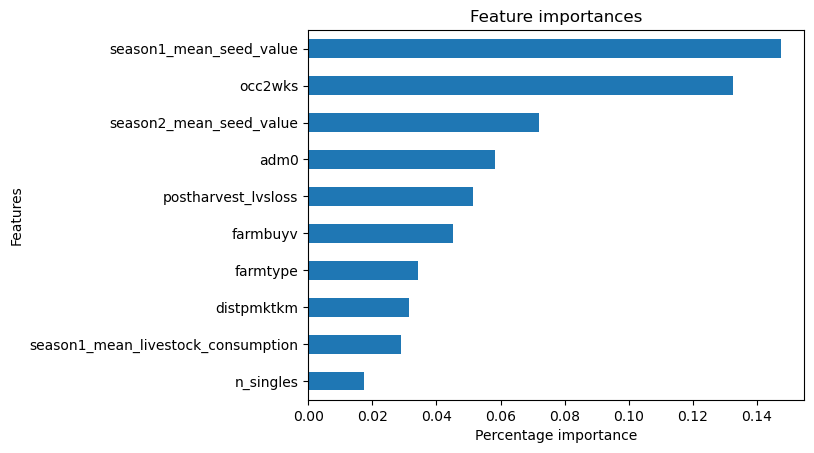

In [47]:
#plot the top 10 feature importances
series.head(10).sort_values().plot(kind='barh')
plt.xlabel('Percentage importance')
plt.ylabel('Features')
plt.title('Feature importances');

In [48]:
#from this plot, we observe that season1mean_seed_value, weeks spent on secondary occupation, season2_mean_seed_value
#had more effects in the prediction of the model (the direction is not considered here, just the magnitude)

<AxesSubplot:>

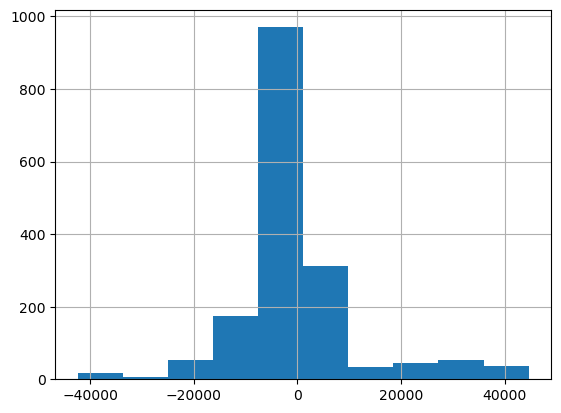

In [53]:
xgb_residuals.hist();